## 第三章 计算机上的积分

### 解析积分

使用 Mathematica 或 python 中的 sympy 库可以做一些简单的解析积分。

但不是每一个函数的解析积分都能计算，很多时候数值积分更加可靠。

简单举例：宽度为l的一维无限深势阱中粒子的基态波函数为：

$$\psi(x) = \sqrt{2\over l} \sin({\pi x \over l})$$

计算粒子的概率密度分布 $\rho(x)$,平均位置 $\langle x \rangle$,平均动量 $\langle p \rangle$

物理量A的均值为：

$$\langle A \rangle = \int_0^l \psi^*(x) \hat{A} \psi(x) dx $$

其中 $\hat{A}$ 代表A的算符。

位置算符为 $\hat{x}=x$

动量算符为 $\hat{p}_x = - i \hbar \partial_x$

动量平方的算符为 $\hat{p}_x^2 = - \hbar^2 \partial_{xx}$

概率密度，位置均值与动量均值的计算公式为：

$$\rho(x) = \Psi^*(x) \Psi(x)$$

$$\langle x \rangle =  \int_0^l \Psi^*(x) x \Psi(x) dx$$

$$\langle p \rangle =  \int_0^l \Psi^*(x) \left( -i\hbar \partial_x \right) \Psi(x) dx$$

使用 sym.diff(psi, x) 可以计算 $\psi$ 对 x 的一阶导数 $d\psi \over dx$。

使用 sym.diff(psi, x, x) 或 sym.diff(psi, x, 2) 可以计算 $\psi$ 对x的二阶导数。


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym

import seaborn as sns
sns.set_context("talk")
 
x, l = sym.symbols('x, l')

psi = sym.sqrt(2/l) * sym.sin(sym.pi * x / l)

psi

sqrt(2)*sqrt(1/l)*sin(pi*x/l)

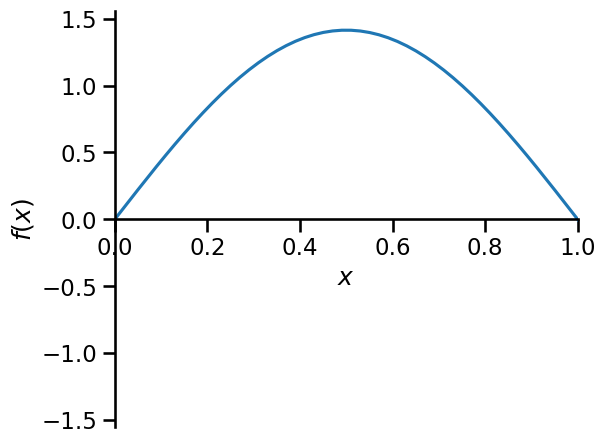

In [2]:
from sympy.plotting import plot

# 可视化基态波函数
plot(psi.subs({l:1}), xlim=(0, 1))

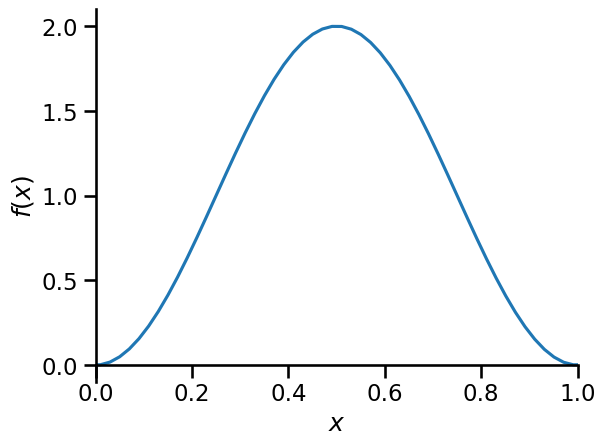

In [3]:
# 可视化粒子数密度 (rho = <psi | psi> )
plot((psi*psi).subs({l:1}), xlim=(0, 1))

In [4]:
## 位置的平均值：积分计算
avg_x = sym.integrate(psi*x*psi, (x, 0, l))

### 化简 simplify 得到平均位置
sym.simplify(avg_x)

l/2

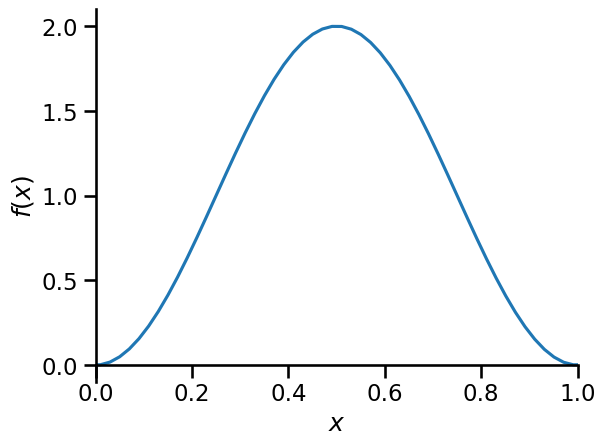

In [5]:
# 可视化粒子数密度 (rho = <psi | psi> )
plot((psi*psi).subs({l:1}), xlim=(0, 1))

In [6]:
## 位置的平均值：积分计算
avg_x = sym.integrate(psi*x*psi, (x, 0, l))

### 化简 simplify 得到平均位置
sym.simplify(avg_x)

l/2

In [7]:
# 检查 sympy 里的虚数符号
sym.I * sym.I

-1

In [8]:
# 检查 sympy 中的微分计算 d psi / dx
sym.diff(psi, x)

sqrt(2)*pi*sqrt(1/l)*cos(pi*x/l)/l

In [9]:
## ## 动量的平均值：微分算子 + 积分计算
hbar = sym.symbols("hbar")

p_rho = psi * (-sym.I * hbar) * sym.diff(psi, x)

avg_p = sym.integrate(p_rho, (x, 0, l))

sym.simplify(avg_p)

0

思考：

如何计算坐标的不确定度 $\langle \Delta x^2 \rangle$ 与动量的不确定度 $\langle \Delta p^2 \rangle$

$\langle \Delta x^2 \rangle =  \langle x^2 \rangle - \langle x \rangle^2$

$\langle \Delta p^2 \rangle =  \langle p^2 \rangle - \langle p \rangle^2$

In [10]:
# 计算坐标的不确定度

avg_x2 = sym.integrate(psi*x*x*psi, (x, 0, l))

sym.simplify(avg_x2)

-l**2/(2*pi**2) + l**2/3

In [11]:
Uncertainty_x = avg_x2 - avg_x
sym.simplify(Uncertainty_x)

-l**2/(2*pi**2) + l**2/3 - l/2

In [12]:
p2_rho = psi * (-sym.I * hbar)**2 * sym.diff(psi, x, 2)

avg_p2 = sym.integrate(p2_rho, (x, 0, l))

sym.simplify(avg_p2)

Piecewise((pi**2*hbar**2/l**2, ((l > -oo) | (l > 0)) & ((l > -oo) | (l < oo)) & ((l > 0) | (l < 0)) & ((l < 0) | (l < oo))), (0, l >= 0))

## 数值积分

在工作中，最常用的python低维度数值积分方法（比如1维、2维数值积分）是`scipy.integrate.simps()`函数和`scipy.integrate.quad()`函数。

举例：可能很多人没意识到，椭圆的周长没有简单的解析公式，只能数值求解，

$${x^2 \over a^2} + {y^2 \over b^2} = 1$$

设方位角为$\theta$, 则椭圆上的任一点的坐标可以用$\theta$表示为:

$$x = a \cos \theta \\
y = b \sin \theta$$

此时椭圆周长的计算公式为:

$$L = \int dl = \int \sqrt{dx^2 + dy^2}\\
= \int_0^{2\pi} \sqrt{({dx \over d\theta})^2 + ({dy \over d\theta})^2} d\theta \\
= \int_0^{2\pi} \sqrt{a^2\sin^2\theta + b^2\cos^2\theta} d\theta$$

In [13]:
from scipy.integrate import quad
# 1 维数值积分用 quad
# 2 维数值积分用 dblquad
# 3 维数值积分用 tplquad
# n 维数值积分用 nquad

help(quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)
    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is t

In [15]:
# 验证 sympy 不能给出椭圆周长的解析积分公式
a, b, theta = sym.symbols('a b theta')
L = sym.integrate(sym.sqrt(a**2 * sym.sin(theta)**2 + b**2 * sym.cos(theta)**2), (theta, 0, 2*sym.pi))
sym.simplify(L)

Integral(sqrt(a**2*sin(theta)**2 + b**2*cos(theta)**2), (theta, 0, 2*pi))

In [16]:
def ellipse_circumference(a = 4, b = 3):
    '''计算椭圆周长
    :a: 椭圆长轴长度
    :b: 椭圆短轴长度'''
    f = lambda t: np.sqrt(a**2 * np.sin(t)**2 + b**2 * np.cos(t)**2)
    circum, err = quad(f, 0, 2*np.pi)
    return circum, err

# 首先验证长轴等于短轴时，椭圆周长与圆周长公式相符
circ, err = ellipse_circumference(a=4, b=4)
np.isclose(circ, 2*np.pi * 4)

np.True_

In [17]:
ellipse_circumference(a=4, b=3)

(22.103492160709497, 2.2162729346186794e-08)

In [18]:
## 对比椭圆周长的低阶精度经验公式 L = 2 pi b + 4 (a - b)

def circ_approximate(a, b):
    if b > a: a, b = b, a
    return 2 * np.pi * b + 4 * (a - b)

circ_approximate(a=4, b=3)

22.84955592153876

### 低维数值积分原理

积分中值定理：

$$\int_a^b{f(x) dx} = (b-a)f(\xi) (\xi \in (a,b))$$

问题转化为如何找到$\xi$

1. 梯形公式：用两端的f(a)和f(b)的平均值作为$f(\xi)$
2. 矩形公式：用a和b的中点对应值$f((a+b)/2)$作为$f(\xi)$
3. 选取适当的(a,b)之间的一些点$x_k$，取$f(x_k)$的加权平均作为高度$f(\xi)$

$$\int_a^b{f(x)}dx \approx \sum_{k=0}^n {A_kf(x_k)}$$

其中$x_k$为求积节点，$A_k$为求积系数。

如果数值求积公式对于任何不高于m次的代数多项式都准确成立，而对m+1次代数多项式不准确成立，则称该求积公式具有m次代数精确度，简称代数精度。

解释：将$f(x)=1, x, x^2, x^3 \cdots x^m$依次带入到积分公式，公式准确成立，而当$x^{m+1}$带入到公式中，公式不再准确成立，则称该数值求积公式具有m次代数精度。

对梯形公式，我们有：

左边：$\int_a^b{1dx}=b-a$，右边：$(b-a)*2/2=b-a$ 0次项成立。

左边：$\int_a^b{xdx}=\frac12 x^2|_a^b = \frac12 (b^2-a^2)$，右边：$(b-a)(b+a)/2=(b^2 - a^2)/2$ 1次项成立。

左边：$\int_a^b{x^2dx}=\frac13 x^3|_a^b = \frac13(b^3-a^3)$，右边：$(b-a)(b^2+a^2)/2=(b^3+a^2b-ab^2-a^3)/2$ 2次项不成立。

梯形公式具有1次代数精度。

对矩形公式，我们有：

左边：$\int_a^b{1dx}=b-a$，右边：$(1*(b-a))=b-a$ 0次项成立。

左边：$\frac12 {b^2-a^2}$，右边：$(a+b)*(b-a)/2=(b^2 - a^2)/2$ 1次项成立。

左边：$\frac13(b^3-a^3)$，右边：$(a+b)^2*(b-a)/4$ 2次项不成立。